# Exercises of application

In [1]:

import pandas as pd
import matplotlib.pyplot as plt


import numpy as np

import seaborn as sns
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances
from sklearn.metrics import silhouette_samples, silhouette_score


plt.style.use("fivethirtyeight")



In [2]:
mallData = pd.read_csv("Mall_Customers.csv")
mallData


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
mallData['Gender'].replace(['Male', 'Female'], [0,1] , inplace = True )
mallData = mallData.drop(columns="CustomerID")

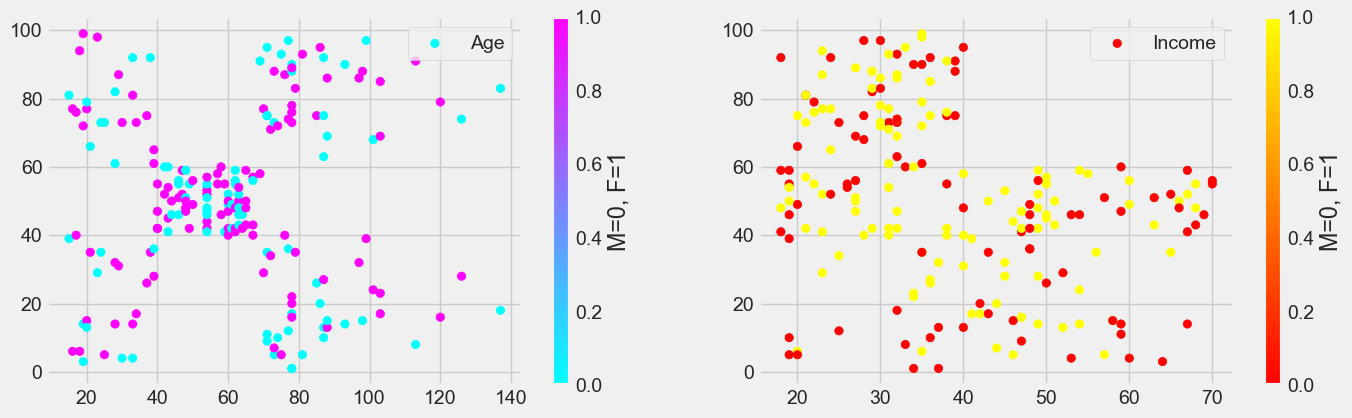

In [4]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,2)
plt.scatter(mallData.iloc[:, 1], mallData.iloc[:, 3], c=mallData.iloc[:, 0], cmap="autumn", label="Income")
plt.colorbar(label="M=0, F=1")
plt.legend()
plt.subplot(2,2,1)
plt.scatter(mallData.iloc[:, 2], mallData.iloc[:, 3], c=mallData.iloc[:, 0], cmap="cool", label="Age")
plt.colorbar(label="M=0, F=1")
plt.legend()



In [5]:
mallData.iloc[:,1:]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


X_std = StandardScaler().fit_transform(mallData.iloc[:,1:])
km = KMeans(n_clusters=10, max_iter =100)
km.fit(X_std)

centroids = km.cluster_centers_

fig, ax = plt.subplots(figsize = (8,4))
y=0


plt.scatter((X_std)[km.labels_ == y,y], X_std[km.labels_ == 1,1],
            c = 'blue', label = 'cluster 2 ')


#plt.scatter(centroids [:, 0], centroids[:,1], marker= '*', s=300,
            #c = "r", label = "centroid")

plt.legend()
plt.xlim ([-4, 4])
plt.ylim ([-2,2])
#plt.xlabel ()
#plt.ylabel ()
plt.title ("Visualization data")
ax.set_aspect("equal");



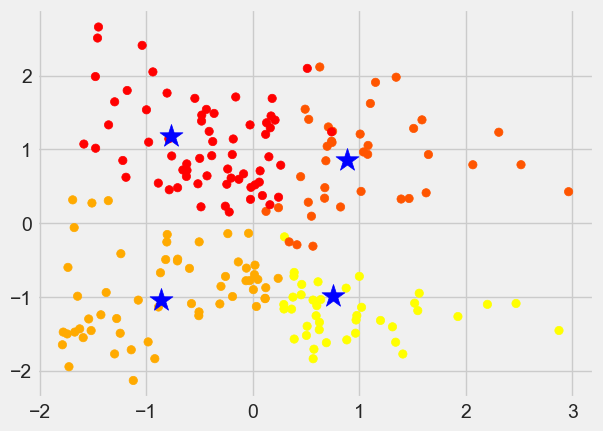

In [55]:
from sklearn.decomposition import PCA
X = StandardScaler().fit_transform(mallData.iloc[:,1:])
X_std = pd.concat([pd.DataFrame(X),mallData["Gender"]],axis=1)
X_std = X_std.values



for k in range(4, 5):
    kmeans = KMeans(n_clusters=k, max_iter=100)
    kmeans.fit(X_std)
    centroids = kmeans.cluster_centers_
    plt.figure()
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X_std)
    centroids_2d = pca.fit_transform(centroids)
    plt.scatter(data_2d[:,1],data_2d[:,0], c=kmeans.labels_,cmap="autumn")
    plt.scatter(centroids_2d[:,1],centroids_2d[:,0],s=300, marker="*", c="blue")

"""plt.scatter(X_std[:,2],X_std[:,0], c=kmeans.labels_,cmap="autumn")
plt.scatter(X_std[:,2],X_std[:,1], c=kmeans.labels_,cmap="autumn")
plt.colorbar()
plt.scatter(centroids [:, 0], centroids[:,1], marker= '*', s=300, c = "blue", label = "centroid")"""




plt.show()

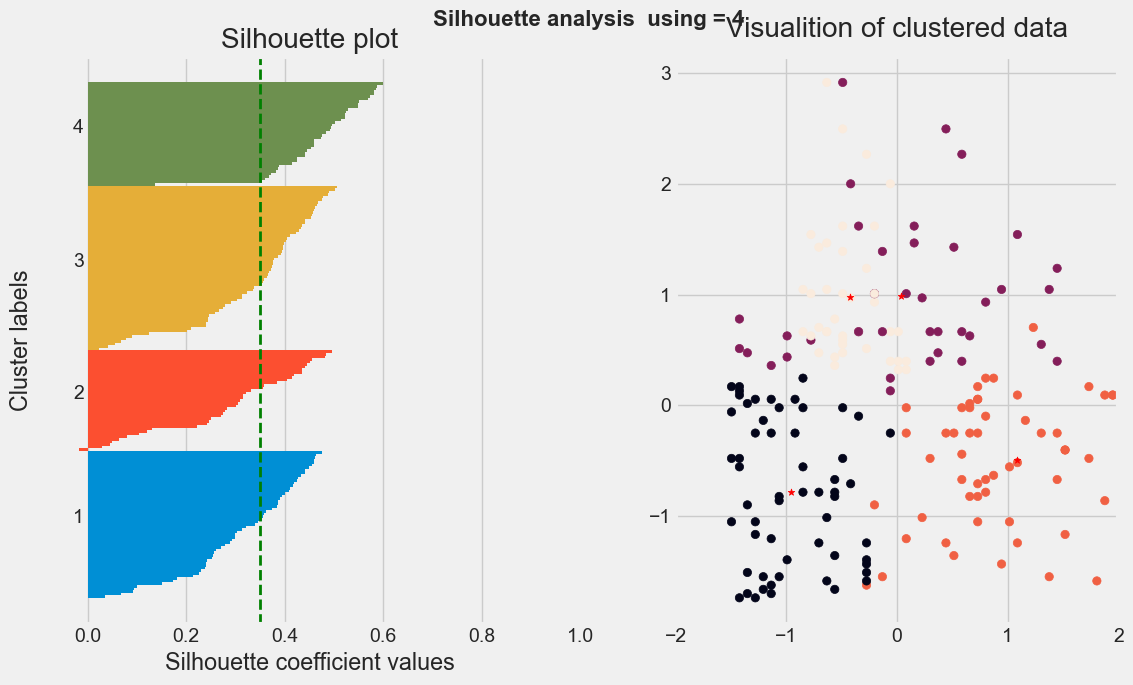

In [50]:

fig, (ax1, ax2,) = plt.subplots (1,2)
fig.set_size_inches(12, 7)

labels = kmeans.fit_predict(X_std)
#Silhouette samples
silhouette_vals = silhouette_samples(X_std, labels)

#Silhouette plot
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels== cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor = "none", height = 1)
    ax1.text(-0.03, (y_lower + y_upper)/2, str(i+1))
    y_lower += len(cluster_silhouette_vals)

    #Silhouette average scores and plot
avg_score = np.mean (silhouette_vals)
ax1.axvline(avg_score, linestyle = "--", linewidth =2, color = "green")
ax1.set_yticks([])
ax1.set_xlim ([-0.1,1 ])
ax1.set_xlabel ("Silhouette coefficient values")
ax1.set_ylabel ("Cluster labels")
ax1.set_title ("Silhouette plot")

#Scatter plot of data with labels
ax2.scatter(X_std[:,0], X_std[:, 1], c = labels)
ax2.scatter(centroids[:,0], centroids[:,1], marker = "*", c ="r", s=25)
ax2.set_xlim([-4,4])
ax2.set_xlim([-2,2])
ax2.set_xlabel ("")
ax2.set_ylabel ("")
ax2.set_title ("Visualition of clustered data", y = 1.02)
ax2.set_aspect("equal");
plt.tight_layout()
plt.suptitle(f'Silhouette analysis  using = {k}',
             fontsize = 16, fontweight = "semibold");#%% md
# Exercises of application

C:\Users\Sodez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow method')

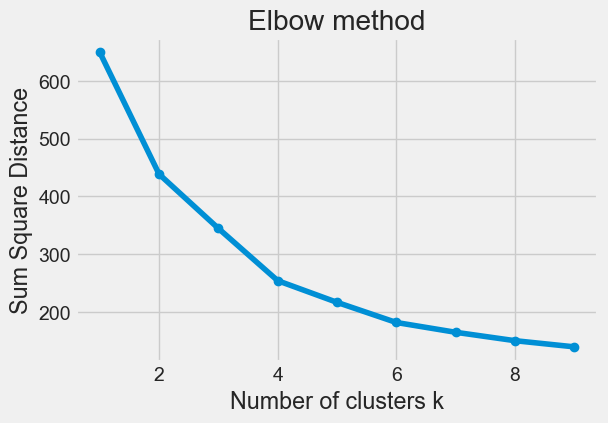

In [51]:
sse = []
list_k = list(range(1,10))

for k in list_k:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(X_std)
    sse.append(kmeans.inertia_)

#plot sse against k

plt.figure(figsize = (6,4))
plt.plot(list_k, sse, '-o')
plt.xlabel ("Number of clusters k")
plt.ylabel ("Sum Square Distance")
plt.title ("Elbow method")

AttributeError: 'KMeans' object has no attribute 'euclidean_distances'

You have a set of data on the customers of a shopping mall such as their gender, age, annual income and spending score. The objective of this assignment is to use the clustering methods outlined in the slides to determine which categories of customers have better spending scores. To download the data set click on the link <a href="https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python">Mall Customers</a>

1. Make scatter plots of the different variables by differentiating each point in space by the color of the sex of the individual. You will use the `scatter()` function of matplotlib.
2. The graphical results show that the formation of several groups according to certain variables. What are these variables ?
3. Use the Elbow method in the k-means to find the optimal number of clusters. To do this, you need to determine the sums of the squares of the distances (total inertia) found in the set of methods of the `KMeans()` function.
4. You will use the different metrics stated at the end of the exercise. You will use the `sklearn.metrics` module to import these evaluation measures and for similarity measures like the Euclidean distance you will use `sklearn.metrics.pairwise`
5. For each of these methods, you will compare the results of each method with that of the k-means.

before all thing, don't forget to make scale on the data (you will use the `StandardScaler()` imported for `sklearn.preprocessing`).

For this, you will use the following clustering techniques:

1. Partition-based clustering

     * K-means
          - For this method, make the graphic also the clusters and centroids
          - Determine the total inertia and the interpretation (The inertia represents the sum of the squares of the distances and is contained in the set of parameters of the KMeans method of the module `sklearn.cluster`)
          - Evaluate this algorithm with the different unsupervised evaluation measures stated at the end of the exercise.
          - Plot the silhouette graph with the `plt.barh()` function and Get the average silhouette score and plot it. For silhouette samples you will use the function `silhouette_samples` to apply to the standardized data and to the data the predicted values (`KMeans().fit_predict()`)
          - interpret these results.

     * K-medoids
          - Apply this method on the data and make the graphical representation of clusters and medoids. You must install the `Kmedoids` module with the command `!pip install Kmedoids`, You will use the `method Kmedoids.pam()` on the dissimilarity matrix that you must calculate with the appropriate distance. specify the default parameters in your function.
          - calculed intra-medoid and inter-medoid silhoutte coeficient. Use the `kmedoids.silhouette()` functions to determine the intramedoid silhouette index and `kmedoids.medoid_silhouette()` to determine the intermedoid silhouette index.
          - Analysed the results

     * Fuzzy C-means
          - apply this method on the data and the cluster centers and the membership matrix. Use the `! pip install fuzzy-c-means` command to install the library, import the `FCM` function from the `fcmeans` package. Specify the number of ideal clusters, the number of iterations and the `random_state` and train the model on the standardized data. Obtain the cluster centers and the membership matrix from the `centers` function of the model. Assign each data point to the cluster with the highest membership with the constructor `u` of model (`model.fit().u`) to retrieve only the values. Assign each data point to the cluster with the highest membership using the function `np.armax()` which returns the indices of the maximum values along an axis.
          - For this method, make the graphic also the clusters and centroids
          - Evaluate this algorithm with the differents similarities measures unsupervised such as the partition coefficient and partition entropy coefficient
          - determine the silhoutte scores, calinski harabasz score and davies bouldin score and interpreted interpret these results

     * Spectral clustering (optional)
          - determine the matrices of the non-normalized and normalized Laplacian
          - use Reducing the dimensions of the data and given the principal components
          - apply the spectral clustering on the data and visualy the clsuters
          - analys each clusters and plot the validation indices as a function of the number of nearest neighbors
          - plot Validation indices as a function of the number k of classes

2. Hierarchical Clustering

     * Agglomerative clustering
          - Determine the dissimilarity matrix with the Ward distance and
          - plot the dendrogram for the linkage_array containing the distances between clusters
          -  represents the points that belong to the clusters and visualize the clusters
          - determine the silhoutte scores, calinski harabasz score and davies bouldin score and interpreted interpret these results

3. Density-based Clustering

     * DBSCAN
          - build the number of clusters in the labels, ignoring noise if it is present.
          - make the graphic also the clusters and the number of noise
          - give a graphical representation of the clusters and the number of noise with eps and min_samples
          - determine the silhoutte scores, calinski harabasz score and davies bouldin score and interpreted interpret these results


**Unsupervised measures** :

     - Silhouette Coefficient
     - Calinski-Harabasz Index
     - Davies-Bouldin Index

**SUBMISSION**

Put your work here !
https://drive.google.com/drive/folders/1WVltb3C61t5t-ZMQ12WfbUMNlN6U_Aih?usp=share_link

**SUBMISSION**

Put your work here ! 
https://drive.google.com/drive/folders/1WVltb3C61t5t-ZMQ12WfbUMNlN6U_Aih?usp=share_link